In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2.	Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

In [2]:
happiness= pd.read_csv("/content/sample_data/0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv")
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [3]:
mexico=happiness[happiness["Country or region"]=="Mexico"]
mexico.set_index("Country or region", inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto

Text(Country or region
Mexico    6.595
Name: Score, dtype: float64, 0.1, 'MEX')

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:571: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


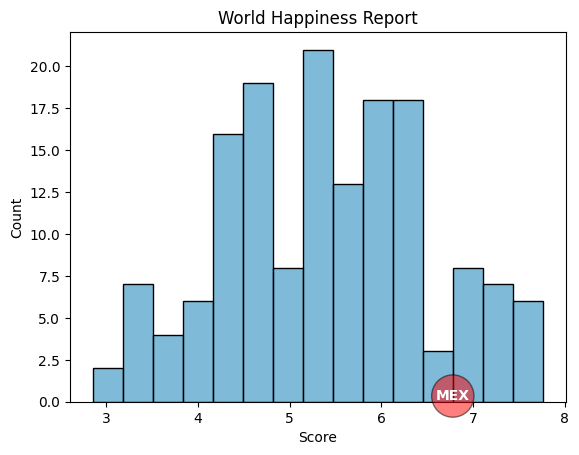

In [4]:
sns.set_palette("icefire")
sns.histplot(data=happiness, x="Score", bins=15)
plt.title("World Happiness Report")
plt.xlabel("Score")
plt.text(mexico["Score"],0.1, "MEX",color="White", fontweight="bold", bbox=dict(facecolor="red", alpha=0.5, boxstyle="Circle"))

5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

Text(1.1, 0.861, 'MEX')

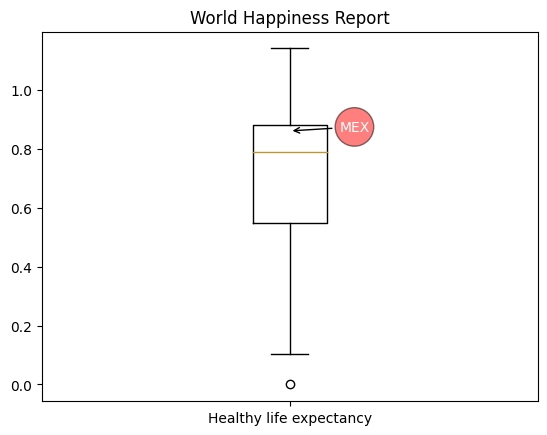

In [6]:
sns.set_palette("husl")
plt.boxplot(happiness["Healthy life expectancy"].dropna(), labels=["Healthy life expectancy"])
plt.title("World Happiness Report")
mex_value= happiness.loc[happiness["Country or region"]== "Mexico", "Healthy life expectancy"].to_list()[0]
plt.annotate("MEX", xy=(1,mex_value), xytext=(1.1,mex_value), color="White", arrowprops=dict(arrowstyle="->"), bbox=dict(boxstyle="circle", facecolor="Red", alpha=0.5))

6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

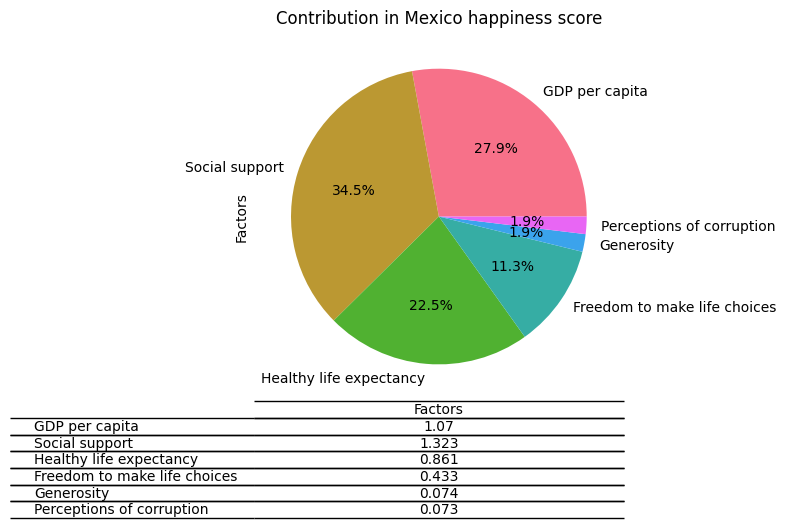

In [7]:
mexico_t=mexico.T
mexico_t=mexico_t.drop(["Overall rank", "Score"], axis=0)
mexico_t.columns=["Factors"]
mexico_t.plot.pie(y="Factors", labels=mexico_t.index, autopct="%1.1f%%", legend=False)
plt.title("Contribution in Mexico happiness score")
table=plt.table(cellText=mexico_t.values, colLabels=mexico_t.columns, rowLabels=mexico_t.index, cellLoc="center", edges="horizontal")


7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores

<Axes: >

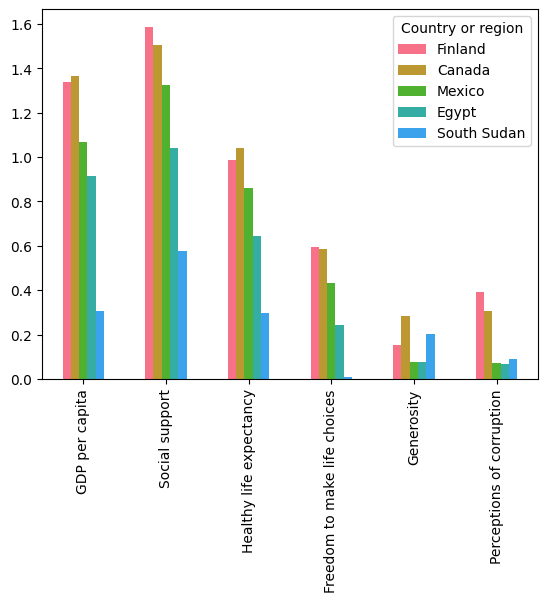

In [8]:
max_pais = happiness.loc[happiness["Score"].idxmax(),"Country or region"]
min_pais = happiness.loc[happiness["Score"].idxmin(),"Country or region"]
paises=happiness[happiness["Country or region"].isin(["Mexico", "Canada", "Egypt",max_pais, min_pais])]
paises.set_index(["Country or region"])
paises=paises.T
paises.columns=paises.loc["Country or region"]
#paises.columns= paises.loc(["Country or region"])
paises= paises.drop(["Overall rank","Score", "Country or region"], axis=0)
paises.plot.bar()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

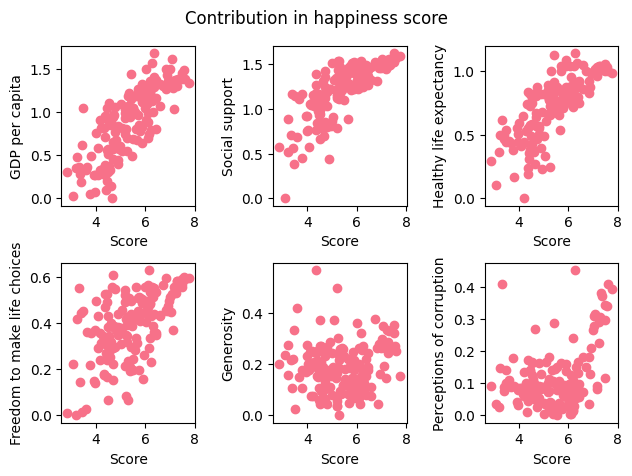

In [9]:
fig, axs = plt.subplots(2, 3)
a=0
b=0
for i in happiness.columns[-6:]:
    axs[a,b].scatter(happiness["Score"], happiness[i])
    axs[a,b].set_ylabel(i)
    axs[a,b].set_xlabel("Score")

    if b==2:
        b=0
        a=a+1
    else:
        b=b+1

fig.suptitle("Contribution in happiness score")
fig.tight_layout(pad=1.0)
plt.show()

<Axes: >

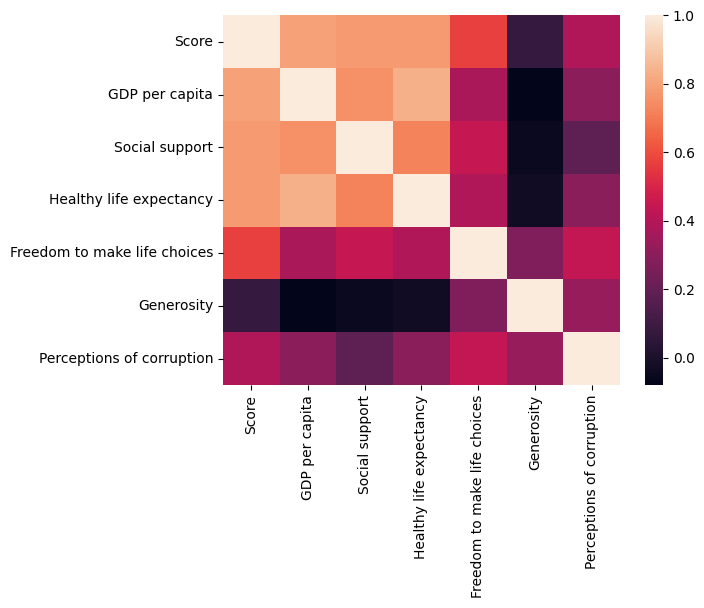

In [10]:
corr = happiness.select_dtypes('number').drop(["Overall rank"], axis=1).corr()
sns.heatmap(corr)

9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

Text(0.5, 1.0, 'World Happiness Report')

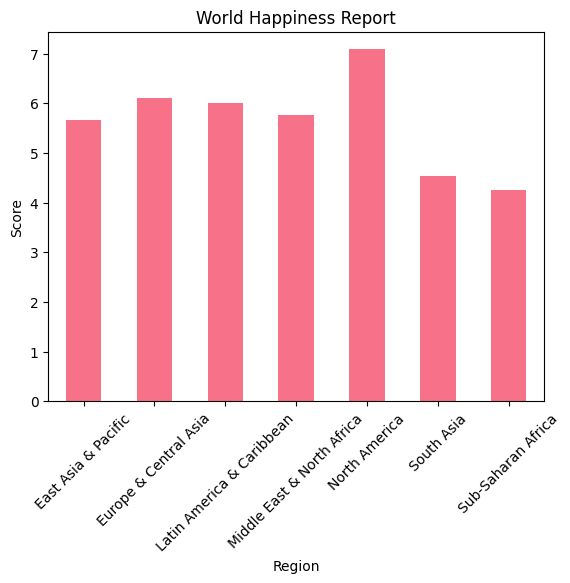

In [15]:
metadata=pd.read_csv("/content/sample_data/0.9ep3krj7s1o0.ona2jvufk4mMetadata.csv")
complete= pd.merge(left=happiness, right=metadata, right_on="TableName", left_on="Country or region")
region=complete.groupby(["Region"])[["Score"]].mean()
region.plot.bar(rot=45, legend=False)
plt.ylabel("Score")
plt.title("World Happiness Report")